In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data_df=pd.read_csv("heart.csv")


In [27]:
data_df.isnull().sum()


age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

In [28]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  target    920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


In [29]:
#2. distribution of target variable.
data_df['target'] = np.where(data_df['target']!= 0, 1, 0)      # Make all non zeroes 1
data_df['target'] = data_df['target'].astype('category')       # Convert into categorical data (int-->category)
data_df.head()


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [30]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       920 non-null    int64   
 1   sex       920 non-null    object  
 2   dataset   920 non-null    object  
 3   cp        920 non-null    object  
 4   trestbps  861 non-null    float64 
 5   chol      890 non-null    float64 
 6   fbs       830 non-null    object  
 7   restecg   918 non-null    object  
 8   thalch    865 non-null    float64 
 9   exang     865 non-null    object  
 10  oldpeak   858 non-null    float64 
 11  slope     611 non-null    object  
 12  ca        309 non-null    float64 
 13  thal      434 non-null    object  
 14  target    920 non-null    category
dtypes: category(1), float64(5), int64(1), object(8)
memory usage: 101.8+ KB


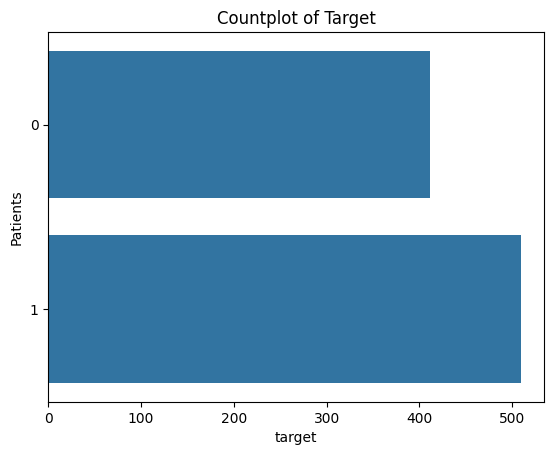

In [31]:
sns.countplot(data_df['target'])
# Add labels
plt.title('Countplot of Target')
plt.xlabel('target')
plt.ylabel('Patients')
plt.show()

Let us proceed by splitting our training and test data and our input and target variables. Since we are using KNN, it is mandatory to scale our datasets too.

In [32]:
# Create a list of categorical columns and numerical columns
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal','dataset']

num_cols = ['age','trestbps','chol','thalch','oldpeak']


In [33]:
df_continuous = data_df[num_cols]
df_continuous.fillna(0, inplace=True)

/home/u213913/tmp/ipykernel_2065662/1546792749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continuous.fillna(0, inplace=True)


In [34]:
# creating a Knn model
y = data_df["target"].values
x = df_continuous

#Scaling - mandatory for knn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
ss = StandardScaler()
x = ss.fit_transform(x)

#SPlitting into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) # 70% training and 30% test


The intuition behind choosing the best value of k is beyond the scope of this article, but we should know that we can determine the optimum value of k when we get the highest test score for that value. For that, we can evaluate the training and testing scores for up to 20 nearest neighbors:

In [35]:
from sklearn.neighbors import KNeighborsClassifier
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)

    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)

    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

To evaluate the max test score and the k values associated with it, run the following command:

In [36]:
## score that comes from the testing set only
max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

Max test score 78.62318840579711 and k = [20]


Thus, we have obtained the optimum value of k to be 3, 11, or 20 with a score of 83.5. We will finalize one of these values and fit the model accordingly:

In [37]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(3)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6884057971014492

Now, how do we evaluate whether this model is a ‘good’ model or not? For that, we use something called a Confusion Matrix:

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
y_pred = knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,83,46,129
1,40,107,147
All,123,153,276


In [39]:
cm

array([[ 83,  46],
       [ 40, 107]])

In [40]:
acc=np.sum(np.diag(cm))/np.sum(cm)
prec=cm[0,0]/(cm[0,0]+cm[1,0])
recal=cm[0,0]/(cm[0,0]+cm[0,1])
fscore=2*(prec*recal)/(prec+recal)


In [41]:
print("Accuracy:", acc)
print("Precision: ",prec)
print("Recall: ",recal)
print("f1-score: ",fscore)

Accuracy: 0.6884057971014492
Precision:  0.6747967479674797
Recall:  0.6434108527131783
f1-score:  0.6587301587301587


All these measures in single function:

In [42]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.64      0.66       129
           1       0.70      0.73      0.71       147

    accuracy                           0.69       276
   macro avg       0.69      0.69      0.69       276
weighted avg       0.69      0.69      0.69       276



In [43]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [44]:
# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC: %.3f' % auc)

AUC: 0.726


In [45]:
from sklearn.metrics import RocCurveDisplay

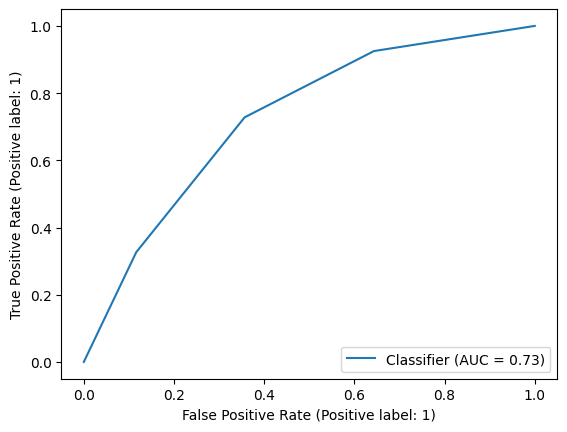

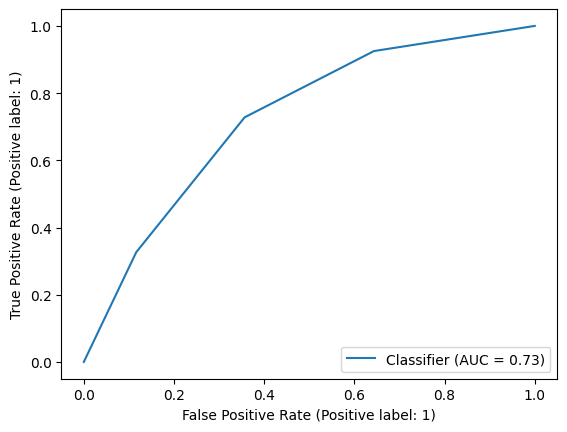

In [46]:
# Create a RocCurveDisplay object
roc_curve_display = RocCurveDisplay.from_predictions(y_test, y_pred_proba)

# Plot the ROC curve
roc_curve_display.plot()

# Model 2: Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
modelLR = LogisticRegression()
modelLR.fit(X_train, y_train)
y_predLR = modelLR.predict(X_test)
accuracyLR = metrics.accuracy_score(y_test, y_predLR)
precisionLR = metrics.precision_score(y_test, y_predLR)
recallLR = metrics.recall_score(y_test, y_predLR)

print("Accuracy:", accuracyLR)
print("Precision:", precisionLR)
print("Recall:", recallLR)


Accuracy: 0.7608695652173914
Precision: 0.7579617834394905
Recall: 0.8095238095238095


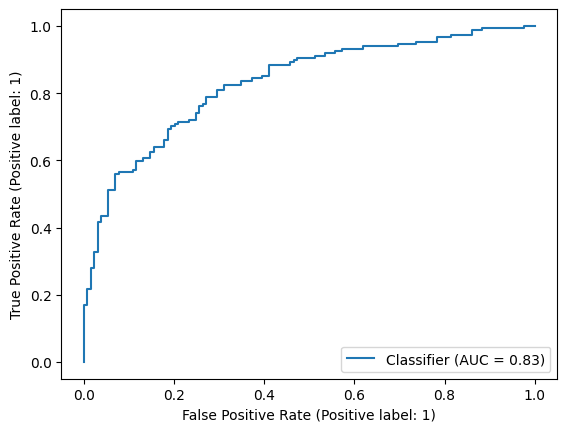

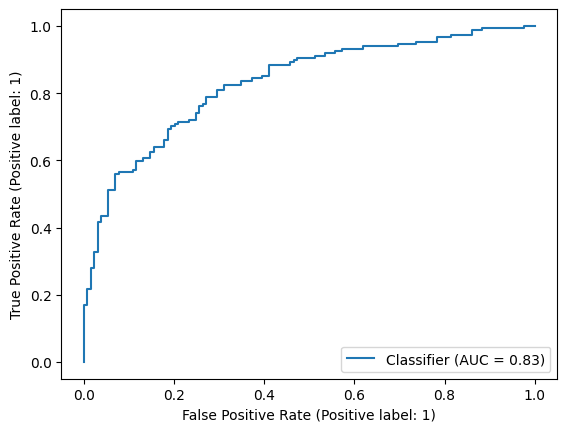

In [63]:
from sklearn.metrics import RocCurveDisplay
y_pred_probaLR = modelLR.predict_proba(X_test)[:,1]
roc_curve_displayLR = RocCurveDisplay.from_predictions(y_test, y_pred_probaLR)
roc_curve_displayLR.plot()

# Model 3: SVM

In [68]:
from sklearn import svm
modelSVM = svm.SVC(kernel='linear',probability=True)
modelSVM.fit(X_train, y_train)
y_predSVM = modelSVM.predict(X_test)
accuracySVM = metrics.accuracy_score(y_test, y_predSVM)
precisionSVM = metrics.precision_score(y_test, y_predSVM)
recallSVM = metrics.recall_score(y_test, y_predSVM)

print("Accuracy:", accuracySVM)
print("Precision:", precisionSVM)
print("Recall:", recallSVM)


Accuracy: 0.75
Precision: 0.7532467532467533
Recall: 0.7891156462585034


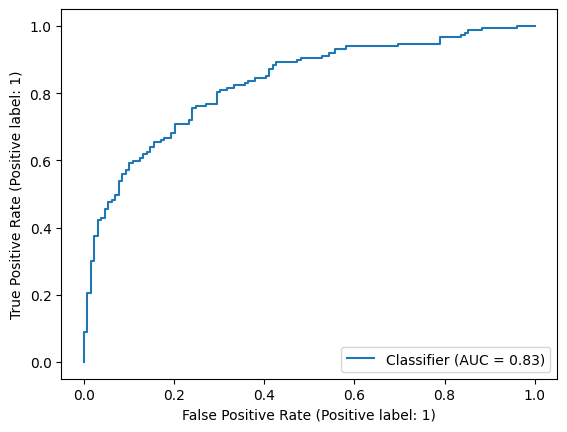

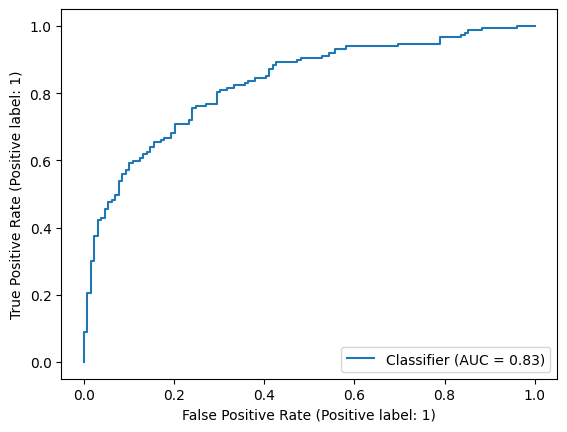

In [69]:
from sklearn.metrics import RocCurveDisplay
y_pred_probaSVM = modelSVM.predict_proba(X_test)[:,1]
roc_curve_displaySVM = RocCurveDisplay.from_predictions(y_test, y_pred_probaSVM)
roc_curve_displaySVM.plot()

# Model 4: Descision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier(criterion="entropy")
modelDT.fit(X_train, y_train)
y_predDT = modelDT.predict(X_test)
accuracyDT = metrics.accuracy_score(y_test, y_predDT)
precisionDT = metrics.precision_score(y_test, y_predDT)
recallDT = metrics.recall_score(y_test, y_predDT)

print("Accuracy:", accuracyDT)
print("Precision:", precisionDT)
print("Recall:", recallDT)

Accuracy: 0.7028985507246377
Precision: 0.7304964539007093
Recall: 0.7006802721088435


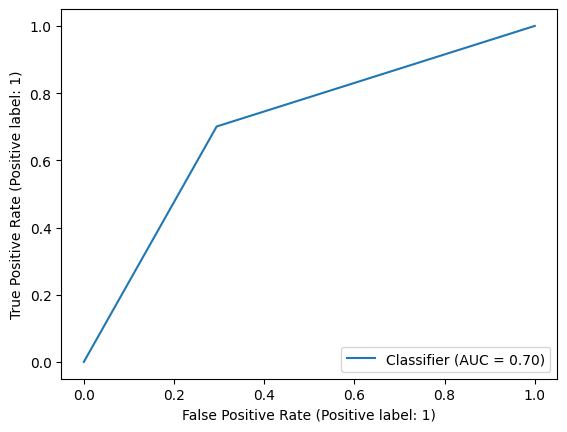

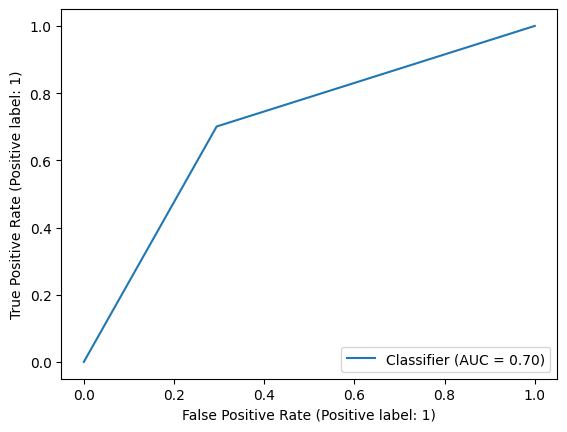

In [65]:
from sklearn.metrics import RocCurveDisplay
y_pred_probaDT = modelDT.predict_proba(X_test)[:,1]
roc_curve_displayDT = RocCurveDisplay.from_predictions(y_test, y_pred_probaDT)
roc_curve_displayDT.plot()